In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sahisti = pd.read_csv("Glavna_tabela.csv")
sahisti

,Rang,Uporabniško ime,Ime,Priimek,Elo,ID,Država,Številka države,Naslov,Skupno igre,...,Skupno remiji,Skupno porazi,Strela elo,Metek elo,Opazovalci,Celina,Datum,Leto,Reciprikal prebivalstva države,Spol
0,1,ManuDavid2910,Manu,David,2966,6083387,India,69,FM,251,...,16,35,3041,3190,117044,Asia,2011-11-07,2011,7.054714e-10,Moški
1,2,MagnusCarlsen,Magnus,Carlsen,2941,3889224,Norway,104,GM,313,...,109,36,3308,3184,5278335,Europe,2010-08-26,2010,1.785380e-07,Moški
2,3,GutovAndrey,Andrey,Gutov,2936,26824392,United States,2,GM,143,...,1,1,2514,2312,543103,North America,2016-02-20,2016,2.940217e-09,Moški
3,4,SeanWinshand,Sean,Winshand,2884,57549096,Indonesia,70,GM,1175,...,525,109,3050,3072,203583,Asia,2019-02-19,2019,3.515695e-09,Moški
4,5,Bigfish1995,Vladimir,Fedoseev,2851,26303484,Slovenia,127,GM,709,...,174,144,3110,3000,261818,Europe,2016-01-23,2016,4.693430e-07,Moški
5,6,Firouzja2003,Alireza,Firouzja,2844,42022994,France,52,GM,287,...,99,67,3260,3357,919371,Europe,2018-01-05,2018,1.456282e-08,Ni znano
6,7,LyonBeast,Maxime,Vachier-Lagrave,2844,17306408,France,52,GM,364,...,124,62,3243,3174,535502,Europe,2014-05-15,2014,1.456282e-08,Moški
7,8,Hikaru,Hikaru,Nakamura,2839,15448422,United States,2,GM,879,...,273,105,3430,3313,10165124,North America,2014-01-06,2014,2.940217e-09,Ženska
8,9,lachesisQ,Ian,Nepomniachtchi,2810,28417564,Russia,116,GM,343,...,119,74,3182,3091,457391,Asia,2016-05-30,2016,6.847987e-09,Moški
9,10,LevonAronian,Levon,Aronian,2808,26897402,United States,2,GM,409,...,143,90,3104,3057,115599,North America,2016-02-23,2016,2.940217e-09,Moški


# Analiza po državah
Naredili bomo analizo na dva načina. Prvi bo, da gledamo direktno po državah, drugi pa, da države grupiramo po celinah in naredimo analizo po celinah. Za začetek bomo pogledali katerih je top 5 držav iz katerih so šahisti. Med njimi pričakujemo Indijo, Rusijo in ZDA.

<Axes: xlabel='Država'>

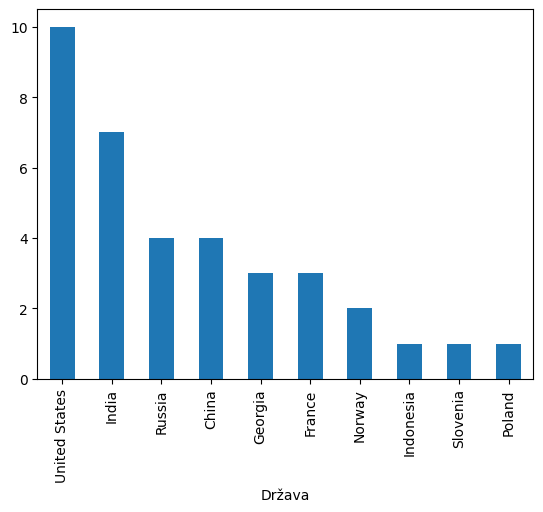

In [12]:

sahisti["Država"].value_counts().head(10).plot(kind = "bar")

Sedaj podobno naredimo, le da namesto držav pogledamo Celine. Pričakujemo, da bo največ šahistov iz Azije, če ne drugega zato, ker je celina z največ prebivalci. Po drugi strani pričakujemo, da bo najmanj šahistov iz Afrike.

<Axes: ylabel='count'>

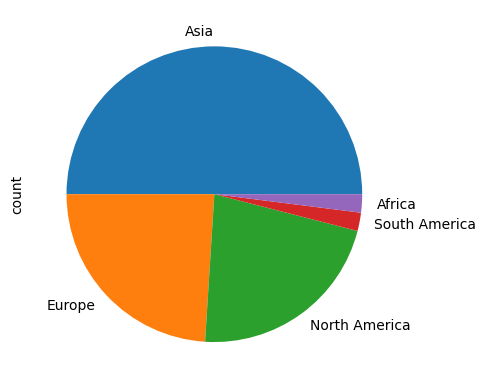

In [13]:
(sahisti["Celina"].value_counts()).plot(kind="pie")

Kot smo že nakazali, morda golo število šahistov ni dober pokazatelj kako dobra je država (oziroma celina) v šahu, saj so potem majhne države zapostavljene. Torej bo bolje gledati število šahistov glede na prebivalca.

<Axes: xlabel='Število šahistov na prebivalca', ylabel='Država'>

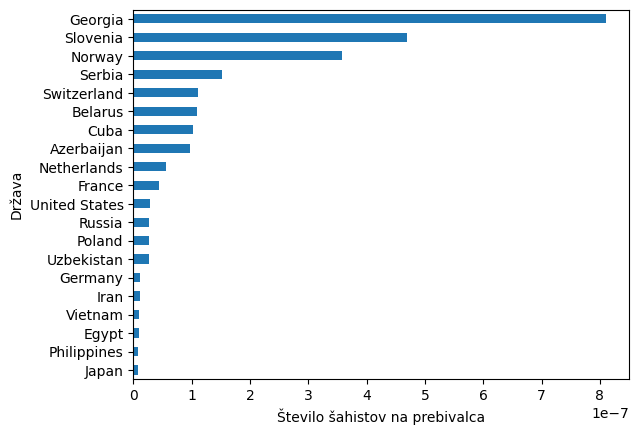

In [14]:

sahisti[["Država","Reciprikal prebivalstva države"]].groupby("Država").sum().sort_values("Reciprikal prebivalstva države").tail(20).plot(kind = "barh", xlabel="Število šahistov na prebivalca", legend=False)

<Axes: xlabel='Celina'>

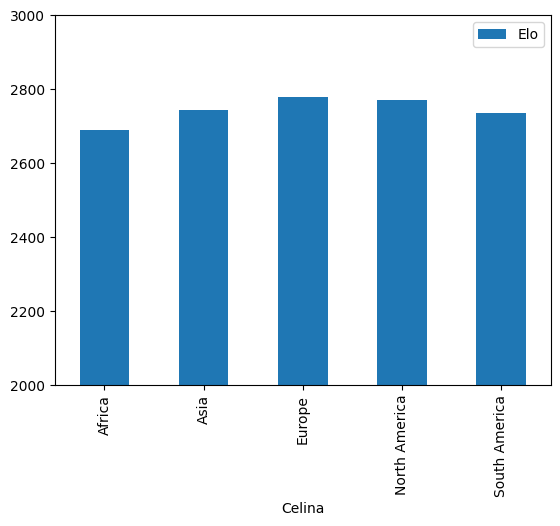

In [15]:

sahisti[["Celina","Elo"]].groupby("Celina").mean().plot(kind = "bar",ylim=(2000, 3000))

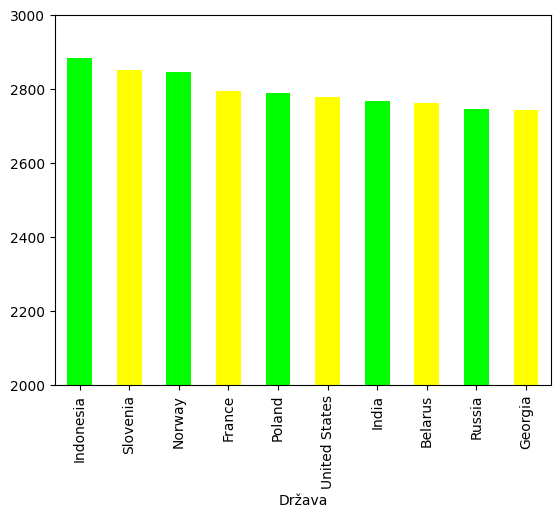

In [18]:

sahisti[["Država","Elo"]].groupby("Država").mean().sort_values("Elo", ascending=False).head(10)["Elo"].plot(kind = "bar",ylim=(2000, 3000),color = ["lime","yellow"])
plt.show()

# Analiza po času
Tudi po času bomo analizirali podatke na več načinov. Prvo bomo pogledali kdaj so se igralci v top 1500 pridružili na chess.com in v katerem letu se jih je pridružilo največ. Prav tako bomo pogledali, če obstaja korelacija med Elotom in časum pridružitve. Pričakujemo, da se je največ igralcev pridružilo v letu 2020, saj je takrat med Covidom postalo popularno streamanje šaha na Twitchu in podobnih platformah.


<Axes: xlabel='Datum', ylabel='Število šahistov'>

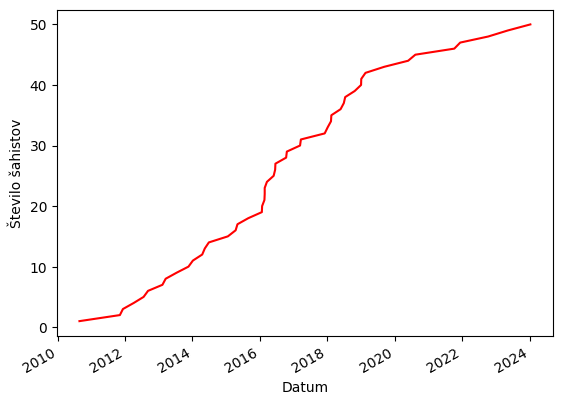

In [19]:

sahisti["Datum_2"] = pd.to_datetime(sahisti["Datum"])
sahisti["šteti"] = 1
sahisti["skupno_štetje"] = sahisti.sort_values("Datum_2")["šteti"].cumsum()
sahisti[["Datum_2","skupno_štetje"]].sort_values("Datum_2").plot(y="skupno_štetje",x="Datum_2",ylabel="Število šahistov",xlabel="Datum",legend=False,color = "red")

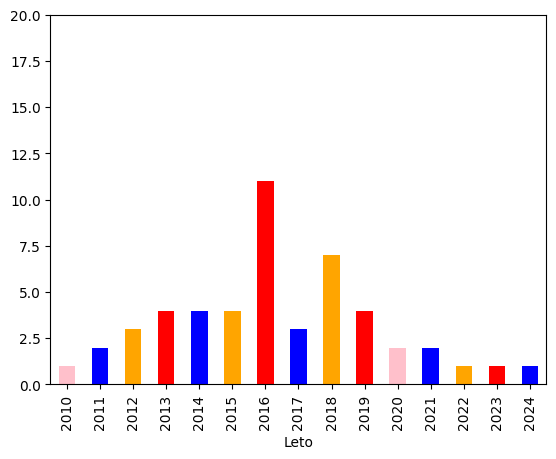

In [20]:

a = sahisti[["Leto","šteti"]].groupby("Leto").sum()["šteti"].plot(kind="bar",color =["pink","blue","orange","red","blue","orange","red","blue","orange","red"],ylim=(0, 20) )

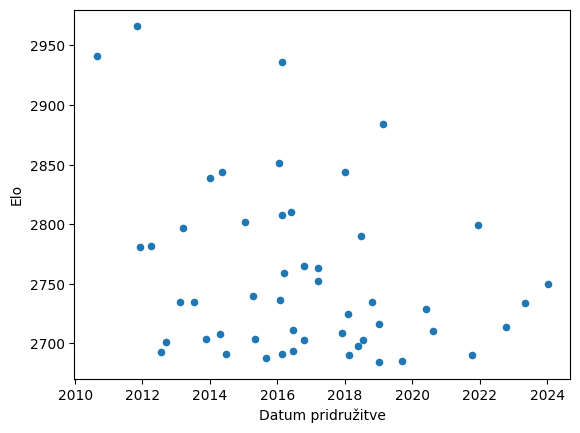

In [21]:

sahisti["Številski datum"] = sahisti["Datum"].apply(lambda x: np.datetime64(x))
a = sahisti.plot(x="Številski datum", y = "Elo",kind="scatter", xlabel = "Datum pridružitve")


# Analiza po spolu
Šahiste bomo analizirali še po spolu. Naložili smo si Pythonovo knjižnico, ki na podlagi imena poizkusi ugotoviti spol osebe. V veliko primerih ne more podati enoznačnega odgovora (saj so nekatera imena manj znana, spet druga lahko tako za moške kot ženske), spet v drugih primerih pa poda napačen odgovor, tako da bodo podatki ki jih dobimo tukaj od vseh najmanj zaneslivi.

In [ ]:
sahisti[["Rang","Ime","Priimek","Uporabniško ime","Spol"]]

,Rang,Uporabniško ime,Spol
0,1,ManuDavid2910,Moški
1,2,MagnusCarlsen,Moški
2,3,GutovAndrey,Moški
3,4,SeanWinshand,Moški
4,5,Bigfish1995,Moški
5,6,Firouzja2003,Ni znano
6,7,LyonBeast,Moški
7,8,Hikaru,Ženska
8,9,lachesisQ,Moški
9,10,LevonAronian,Moški


<Axes: xlabel='Spol'>

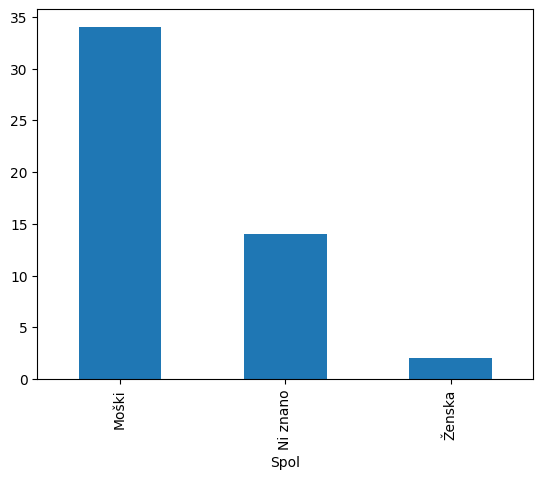

In [16]:

sahisti["Spol"].value_counts().plot(kind="bar")

 Poglejmo še kako se razlikuje povprečni Elo glede na spol. Od tu dalje bomo gledali zgolj moške in ženske.

<Axes: xlabel='Spol'>

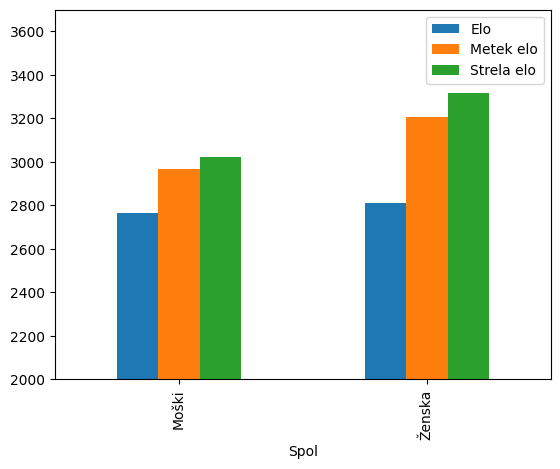

In [26]:
sahisti["Strela elo"] = sahisti["Strela elo"].apply(lambda x: float("nan") if x == "Ne igra strele" else x)
sahisti["Strela elo"]= sahisti["Strela elo"].apply(lambda x: float(x))
sahisti["Metek elo"] = sahisti["Metek elo"].apply(lambda x: float("nan") if x == "Ne igra metka" else x)
sahisti["Metek elo"]= sahisti["Metek elo"].apply(lambda x: float(x))
sahisti[["Spol","Elo","Metek elo","Strela elo"]][(sahisti["Spol"]=="Moški") | (sahisti["Spol"] == "Ženska")].groupby("Spol").mean().plot(kind="bar", ylim=(2000, 3700))

Chess.com nam tudi nudi podatke o tem, koliko ogledov ima nek dani profil. Pogledali si bomo kateri igralci imajo največkrat ogledane profile. Med njimi pričakujemo znane šahovske influencerje, kot so Levy Rozman (Gothamchess), Hikaru Nakamura, Anna Cramling, Aleksandro in Andreo Botez in seveda Magnusa Carlsena.

In [32]:
sahisti[["Rang","Uporabniško ime","Opazovalci"]].sort_values("Opazovalci", ascending=False)

,Rang,Uporabniško ime,Opazovalci
7,8,Hikaru,10165124
1,2,MagnusCarlsen,5278335
5,6,Firouzja2003,919371
14,15,nihalsarin,661640
2,3,GutovAndrey,543103
6,7,LyonBeast,535502
12,13,FabianoCaruana,506238
34,35,wonderfultime,489067
8,9,lachesisQ,457391
16,17,GMWSO,346049


Pogledali si bomo od kod prihajajo najbolj popularni šahisti. Torej iz katere države je top 100 najbolj popularnih šahistov. Pričakujemo, da bo večina iz Amerike, saj je večina popularnih šahistov, kot smo že povedali influencerjev na Youtube-u in Twitchu in nasplošno je znano, da sta ti dve platformi dominirani s strani američanov. Prav tako pričakujemo, da bo veliko Indijcev, saj je nasplošno, kot smo že videli veliko Indijcev v top 1500.

<Axes: xlabel='Država'>

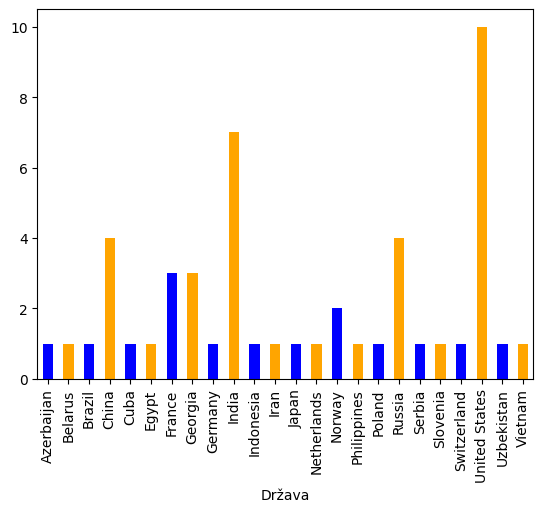

In [11]:
sahisti["ena"] = 1
sahisti[["Država","Opazovalci","ena"]].sort_values("Opazovalci", ascending=False).head(100)[["Država","ena"]].groupby("Država").sum("ena")["ena"].plot(kind="bar", color = ["blue","orange"])

Podobno stvar bi lahko tudi zmerili malo drugače, recimo, da bi pogledali skupne oglede glede na državo, ali pa recimo glede na celino. 

<Axes: xlabel='Država'>

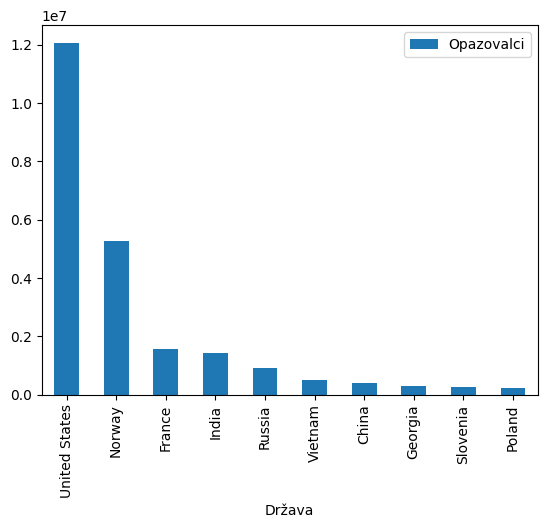

In [19]:
sahisti[["Država", "Opazovalci"]].groupby("Država").sum().sort_values("Opazovalci",ascending=False).head(10).plot(kind = "bar")

<Axes: xlabel='Celina'>

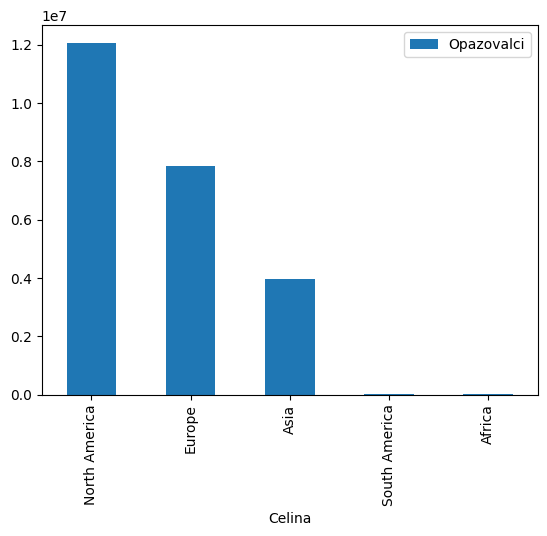

In [21]:
sahisti[["Celina", "Opazovalci"]].groupby("Celina").sum().sort_values("Opazovalci",ascending=False).plot(kind = "bar")